# 切比雪夫窗口

给定特定的旁瓣高度，切比雪夫窗口最小化主瓣宽度。它的特点是等波纹行为。它的旁瓣都具有相同的高度。生成并显示旁瓣衰减为 40 dB 的 50 点 Chebyshev 窗口。

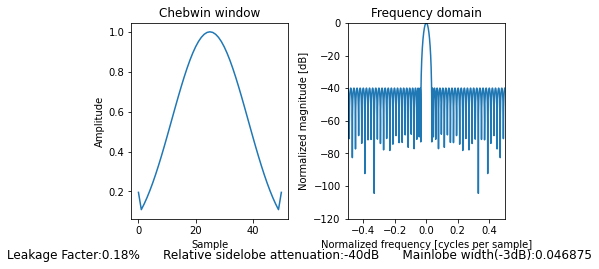

In [2]:
from scipy import signal
import numpy as np
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

window = signal.windows.chebwin(51,40)
fig = plt.figure()
plt.subplot(1, 2, 1)
plt.plot(window)
plt.title("Chebwin window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(1, 2, 2)
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = np.abs(fftshift(A / abs(A).max()))
response = 20 * np.log10(np.maximum(response, 1e-10))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency domain")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.suptitle('Leakage Facter:0.18%      Relative sidelobe attenuation:-40dB      Mainlobe width(-3dB):0.046875',x=0.5,y=0.04)
plt.tight_layout()
plt.show()